In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

,Voltage (V)
0,-0.06
1,-0.06
2,-0.06
3,-0.06
4,-0.06
...,...
9995,0.00
9996,0.00
9997,0.00
9998,0.00


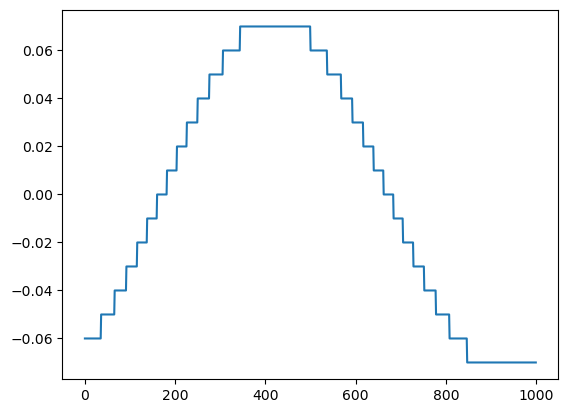

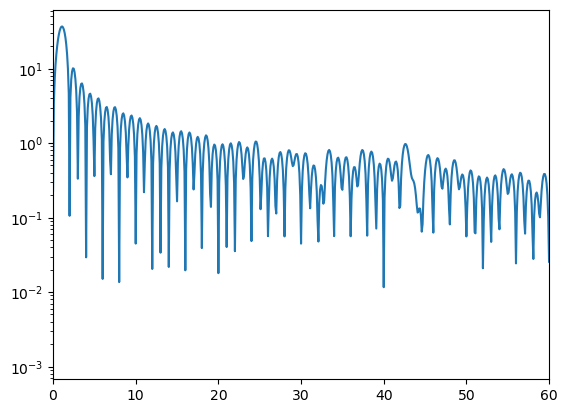

In [9]:
path = 'data/scan.csv'
data = pd.read_csv(path)

data_volts = data['Voltage (V)']
sample_rate = 1000
display(data)
plt.plot(data_volts[0:1000])
plt.show()

data_fft = np.fft.rfft(data_volts)
data_fftfreq = np.fft.rfftfreq(len(data_volts),1./sample_rate)
plt.plot(data_fftfreq, np.abs(data_fft))
plt.xlim(0,60)
#plt.plot([60,60], [0, 400])
plt.yscale('log')
#plt.xscale('log')
plt.show()